# Rainbow plots: Generating useful visualizations with mitransient 

## Overview
In this tutorial, we will take the diffuse Cornell Box scene from the previous tutorial, and use `mitransient`'s visualization functions to represent the time of flight in a single image.

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>Setup and render a Cornell Box scene in the transient domain</li>
  <li>Use the rainbow visualization tools to generate useful plots</li>
</ul>

</div>

In [1]:
# If you have compiled Mitsuba 3 yourself, you will need to specify the path
# to the compilation folder
# import sys
# sys.path.insert(0, '<mitsuba-path>/mitsuba3/build/python')
import mitsuba as mi
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
mi.set_variant('llvm_ad_rgb')

import mitransient as mitr

We use the same scene from the diffuse Cornell Box example

In [2]:
import os
scene = mi.load_file(os.path.abspath('cornell-box/cbox_diffuse.xml'))
transient_integrator = scene.integrator()
transient_integrator.prepare_transient(scene, sensor=0)

We render the scene with 4096 samples per pixel. That way, the next plots will look cleaner. But you can probably get away with less samples.

In [3]:
data_steady, data_transient = transient_integrator.render(scene, spp=4096)

In [4]:
import numpy as np
data_steady = np.array((data_steady / np.quantile(data_steady, 0.99)) ** (1.0 / 2.2))
data_steady[data_steady > 1] = 1
data_transient = np.moveaxis(data_transient, 0, 1)

# Rainbow visualization

We show three examples:
* Rainbow fusion
* Sparse fusion
* Peak time fusion

All three are based on the same principle: for each pixel, find the time where it reaches its maximum value. Then consider we have a video that is 100 frames long. Using `modulo = 20`, `min_modulo = 0` and `max_modulo = 5` means that a pixel will have color only if ` min_modulo <= frame_max % modulo <= max_modulo`.

The way to control this is:
* The bigger the `modulo` is, the larger the stripes that appear on the image will be
* The bigger the difference between `min_modulo` and `max_modulo`, the more pixels that will be painted with color.

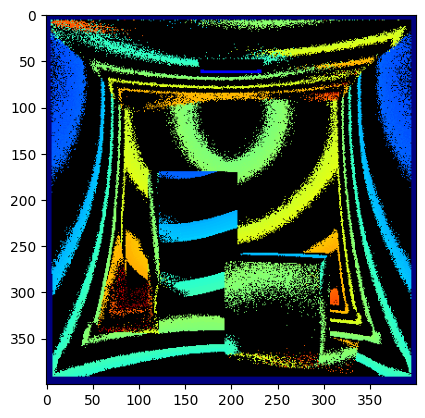

In [5]:
rainbow_vis = mitr.vis.rainbow_visualization(
    data_steady,
    data_transient,
    mode='rainbow_fusion',
    modulo=20,
    min_modulo=0,
    max_modulo=5,
    max_time_bins=200)

import matplotlib.pyplot as plt
plt.imshow(rainbow_vis)

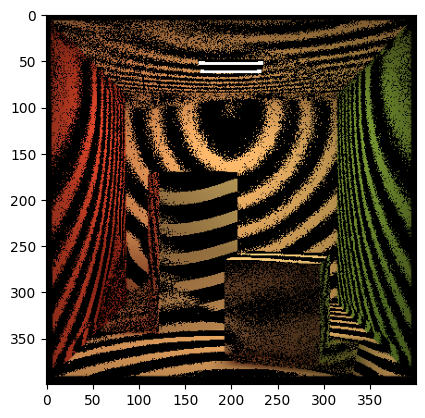

In [6]:
rainbow_vis = mitr.vis.rainbow_visualization(
    data_steady,
    data_transient,
    mode='sparse_fusion',
    modulo=10,
    min_modulo=0,
    max_modulo=3,
    max_time_bins=200,
    scale_fusion=0.8)

import matplotlib.pyplot as plt
plt.imshow(rainbow_vis)

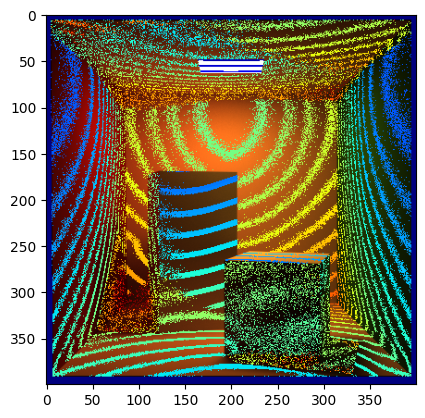

In [7]:
rainbow_vis = mitr.vis.rainbow_visualization(
    data_steady,
    data_transient,
    mode='peak_time_fusion',
    modulo=7,
    min_modulo=0,
    max_modulo=1,
    max_time_bins=200,
    scale_fusion=2)

import matplotlib.pyplot as plt
plt.imshow(rainbow_vis)